In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
Dataset = pd.read_csv("Bank_dataset.csv",sep=';')
Dataset_Copy= Dataset.copy()

In [3]:
Dataset_Copy.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [4]:
Dataset_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# Binning Age column

In [5]:
AgeBin=[]
for age in (Dataset["age"].values):
    if (age >0 and age <=16):
        AgeBin.append("Child")
    elif (age >16 and age <=30):
        AgeBin.append("Young Adult")
    elif (age >30 and age <=45):
        AgeBin.append("Middle-Aged Adult")
    elif (age >45):
        AgeBin.append("Old-Aged Adult")


# Change UNKNOWN Value to UNKNOWN + COLNAME

In [6]:
for (colname,colval) in Dataset_Copy.items():
    Dataset_Copy.loc[(Dataset_Copy[colname] == 'unknown'),colname] ='unknown'+colname

In [7]:
Dataset_Copy.describe()

age         job  marital  education default  balance housing  loan  \
count   4521        4521     4521       4521    4521     4521    4521  4521   
unique    67          12        3          4       2     2353       2     2   
top       34  management  married  secondary      no        0     yes    no   
freq     231         969     2797       2306    4445      357    2559  3830   

         contact   day month  duration  campaign  pdays  previous  \
count       4521  4521  4521      4521      4521   4521      4521   
unique         3    31    12       875        32    292        24   
top     cellular    20   may       123         1     -1         0   
freq        2896   257  1398        27      1734   3705      3705   

               poutcome     y  
count              4521  4521  
unique                4     2  
top     unknownpoutcome    no  
freq               3705  4000

In [8]:
Dataset_Copy.insert(1, 'Age Group', AgeBin)
Dataset_Copy

age          Age Group            job  marital  education default  \
0     30        Young Adult     unemployed  married    primary      no   
1     33  Middle-Aged Adult       services  married  secondary      no   
2     35  Middle-Aged Adult     management   single   tertiary      no   
3     30        Young Adult     management  married   tertiary      no   
4     59     Old-Aged Adult    blue-collar  married  secondary      no   
...   ..                ...            ...      ...        ...     ...   
4516  33  Middle-Aged Adult       services  married  secondary      no   
4517  57     Old-Aged Adult  self-employed  married   tertiary     yes   
4518  57     Old-Aged Adult     technician  married  secondary      no   
4519  28        Young Adult    blue-collar  married  secondary      no   
4520  44  Middle-Aged Adult   entrepreneur   single   tertiary      no   

     balance housing loan         contact day month duration campaign pdays  \
0       1787      no   no        cellular  19   oct       79        1    -1   
1       4789     yes  yes        cellular  11   may      220        1   339   
2       1350     yes   no        cellular  16   apr      185        1   330   
3       1476     yes  yes  unknowncontact   3   jun      199        4    -1   
4          0     yes   no  unknowncontact   5   may      226        1    -1   
...      ...     ...  ...             ...  ..   ...      ...      ...   ...   
4516    -333     yes   no        cellular  30   jul      329        5    -1   
4517   -3313     yes  yes  unknowncontact   9   may      153        1    -1   
4518     295      no   no        cellular  19   aug      151       11    -1   
4519    1137      no   no        cellular   6   feb      129        4   211   
4520    1136     yes  yes        cellular   3   apr      345        2   249   

     previous         poutcome   y  
0           0  unknownpoutcome  no  
1           4          failure  no  
2           1          failure  no  
3           0  unknownpoutcome  no  
4           0  unknownpoutcome  no  
...       ...              ...  ..  
4516        0  unknownpoutcome  no  
4517        0  unknownpoutcome  no  
4518        0  unknownpoutcome  no  
4519        3            other  no  
4520        7            other  no  

[4521 rows x 18 columns]

# Spliting Data

In [9]:
SplitPercentage= float(input("Please Enter Percentage of Train Data: "))

Please Enter Percentage of Train Data: 0.3


In [10]:
# the X features
x = Dataset_Copy[["Age Group","job","marital","education","housing"]].values

# Output Value
y= Dataset_Copy["y"].values   

In [11]:
#Shuffle Dataset and split
from sklearn.model_selection import train_test_split
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size=(1-SplitPercentage), random_state=42)
print(x_Train.shape)
print(x_Test.shape)
print(y_Train.shape)
print(y_Test.shape)

(1356, 5)
(3165, 5)
(1356,)
(3165,)


# NAIVE BAYES ALGORITHM

In [12]:
class NaiveBayes:
    def __init__(self,nf):
        self.Conditional_Probabilities=[]
        self.Prori_Probabilities=[]
        self.Conditional_Counts=[]
        
    # Split the dataset by class values, returns a dictionary
    def SeparateDataBy_class(self,features,target): # NO --> NO RECORDS , YES --> YES RECORD
        separatedData = dict()
        for i in range(features.shape[0]):
            Record = features[i]
            class_value = target[i] #
            if (class_value not in separatedData):
                separatedData[class_value] = list()
            separatedData[class_value].append(features[i])
        return separatedData
    
    
    def calculatePrioriProbability(self,target): # P(NO),P(YES)
        Classes = set(target)
        #print(Classes)
        PrioriProb=dict()
        for i in Classes: # 
            PrioriProb[i]=list(target).count(i)/len(target)
        return PrioriProb
            
        
    def calculateConditionalProbability(self,features,target): #
        SeparatedData = self.SeparateDataBy_class(features,target)
        ALLProbabilities=dict()
        ALLCounts=dict()
        for key in SeparatedData: 
            ProbabilityofKey=dict()
            CountofKey=dict()
            dataframe=pd.DataFrame(SeparatedData[key])
            #return s
            for (columnName,columnVal) in dataframe.items():
                ItemList=list(columnVal)
                columnSet=set(ItemList)
                for value in columnSet:
                    P_OF_VALUE = ItemList.count(value)/len(SeparatedData[key])
                    ProbabilityofKey[value]=P_OF_VALUE
                    CountofKey[value]=ItemList.count(value)
            ALLProbabilities[key]=ProbabilityofKey
            ALLCounts[value]=CountofKey
        return ALLProbabilities , ALLCounts
    
    
    def HandleZeroProbability(self,colval,colindex):
        countkeys=list(self.Conditional_Counts.keys())
        Columnset=set(Dataset_Copy.iloc[:, colindex+1])
        print('this is column seeeeet',Columnset)
        for i in range(len(countkeys)):
            self.Conditional_Counts[countkeys[i]][colval]=1
            for column in Columnset:
                self.Conditional_Counts[countkeys[i]][column]+=1
            KEY_SUM = sum(self.Conditional_Counts[countkeys[i]].values())
            for key in self.Conditional_Counts[countkeys[i]]:
                self.Conditional_Probabilities[countkeys[i]][key]= self.Conditional_Probabilities[countkeys[i]][key] / KEY_SUM
            
            
    
    def fit(self,x_tr,y_tr):
        self.Prori_Probabilities=self.calculatePrioriProbability(y_tr)
        self.Conditional_Probabilities,self.Conditional_Counts=self.calculateConditionalProbability(x_tr,y_tr)
    
    
    def predict(self,x_test):
        ypred=[]
        for testdata in x_test:
                
            predictions = [1] * len(self.Conditional_Probabilities.keys())
            keys=list(self.Conditional_Probabilities.keys())

            for colval in testdata:
                
                for i in range(len(self.Conditional_Probabilities.keys())):
                    #######################################                 HANDLING ZERO CONDITIONAL PROBABILITY
                    if colval not in self.Conditional_Probabilities[keys[i]].keys():
                        self.HandleZeroProbability(colval ,list(testdata).index(colval))
                    #######################################                 HANDLING ZERO CONDITIONAL PROBABILITY
                    
                    predictions[i]*=self.Conditional_Probabilities[keys[i]][colval]
            for i in range(len(self.Conditional_Probabilities.keys())):
                    predictions[i]*=self.Prori_Probabilities[keys[i]]
            Max=np.max(predictions)
            IndexMax=predictions.index(Max)
            ypred.append(keys[IndexMax])
        return ypred
    
    
    
    def Accuracy(self,y_test,ypred): # Calculate the Accuracy for the Model
        if ypred!=None:
            rightPredictions= np.sum(ypred==y_test)
        return rightPredictions/len(y_test)*100

In [13]:
N= NaiveBayes(x_Train.shape[1])
N.fit(x_Train,y_Train)

In [14]:

ypredict=N.predict(x_Test)
AccuracyNaive = N.Accuracy(y_Test,ypredict)
print(AccuracyNaive,"%")

88.56240126382306 %


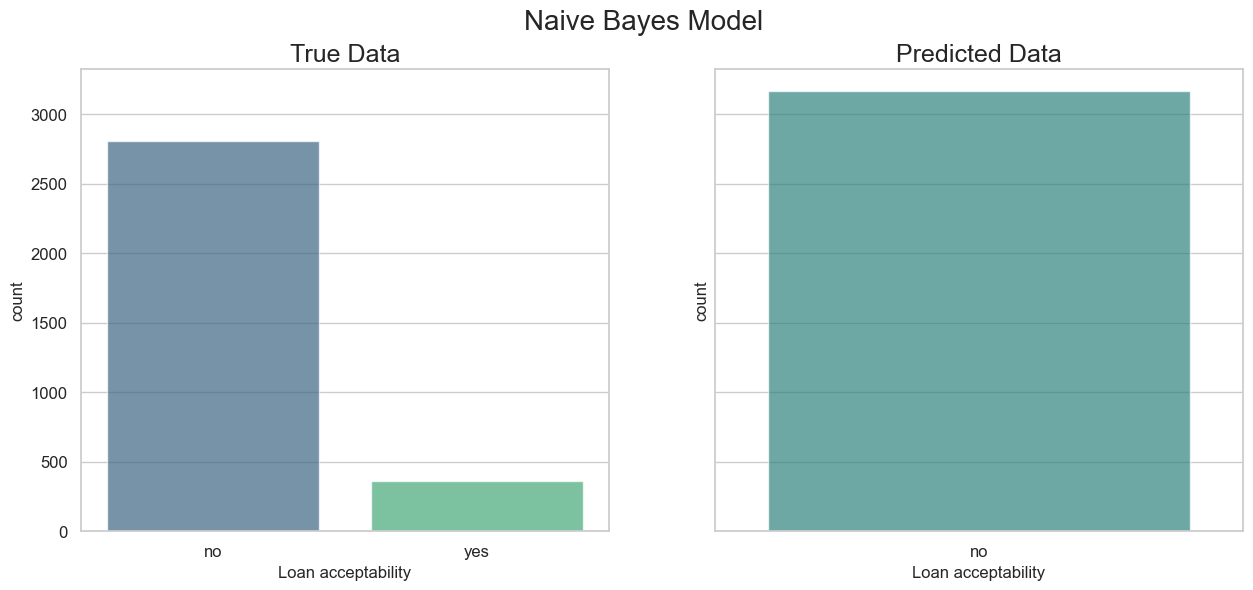

In [15]:
tr = pd.DataFrame(data=y_Test, columns=['Loan acceptability'])
pr = pd.DataFrame(data=ypredict, columns=['Loan acceptability'])


fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))


sns.countplot(x='Loan acceptability', data=tr, ax=ax[0], palette='viridis', alpha=0.7)
sns.countplot(x='Loan acceptability', data=pr, ax=ax[1], palette='viridis', alpha=0.7)


fig.suptitle('Naive Bayes Model', fontsize=20)

ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
ax[0].set_title("True Data", fontsize=18)
ax[1].set_title("Predicted Data", fontsize=18)
plt.show()

In [16]:
Results = {'': ['Accuracy'],
           'Naive Bayes Model': [str(AccuracyNaive)+"%"]}
Results = pd.DataFrame(Results)
Results.set_index('', inplace=True)
Results

Naive Bayes Model
                            
Accuracy  88.56240126382306%